In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import pickle

import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
from random import sample
import matplotlib.patches as mpatches
import statistics as stat
import scipy

### Load Data

In [2]:
#CM_Cells = sc.read_h5ad('./DAP3_SC_CM_Pseudo_PHATE_Man_080521.h5ad')

In [3]:
PATH = '../../Data/Pickles/'
Dict_File = open(PATH + "CM_Large_sgRNA_Dic_Filtered.pkl", "rb")
SGRNA_CELLS_DIC = pickle.load(Dict_File)

In [4]:
PATH = '../../Data/Pickles/'
Dict_File = open(PATH + "Guide_Dictionary_Filtered.pkl", "rb")
Guide_Dictionary = pickle.load(Dict_File)

In [5]:
Clean_NC_Cells = []
[Clean_NC_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary['NC']]

[None, None, None, None]

In [6]:
CB_Enriched = pd.read_pickle('./DAP3_CM_CB_Enriched.pkl')
CB_Depleted = pd.read_pickle('./DAP3_CM_CB_Depleted.pkl')

### Distribution (BarGraph)

In [8]:
cluster_list = ['2', '3', '1', '0']

In [9]:
Target = 'TBX5_PROM1'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBX5_PROM1_Percents = Target_Percents

Target = 'TBX5_PROM2'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBX5_PROM2_Percents = Target_Percents

Target = 'TBXEnh1'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBXEnh1_Percents = Target_Percents

Target = 'TBXEnh2'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBXEnh2_Percents = Target_Percents

Target = 'TBXEnh3'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBXEnh3_Percents = Target_Percents

Target = 'TBXEnh5'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TBXEnh5_Percents = Target_Percents

Target = 'NGFRAP1'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
NGFRAP1_Percents = Target_Percents

NC_SC = CM_Cells[Clean_NC_Cells]
NC_Cell_Num = NC_SC.shape[0]
NC_Percents = []
for cluster in cluster_list:
     NC_Percents.append((NC_SC[NC_SC.obs.louvain == cluster].shape[0]/NC_Cell_Num)*100)

In [10]:
NC_cmap = {
    'Progenitor': '#4c72b0',
    'Early_CM': '#4c72b0',
    'Mid_CM' : '#4c72b0',
    'Late_CM' : '#4c72b0'}

In [11]:
TBX5_Promoters_cmap = {
    'Progenitor': '#c44e52',
    'Early_CM': '#c44e52',
    'Mid_CM' : '#c44e52',
    'Late_CM' : '#c44e52'}

In [12]:
TBX5_Enhancers_cmap = {
    'Progenitor': '#C4B04F',
    'Early_CM': '#C4B04F',
    'Mid_CM' : '#C4B04F',
    'Late_CM' : '#C4B04F'}

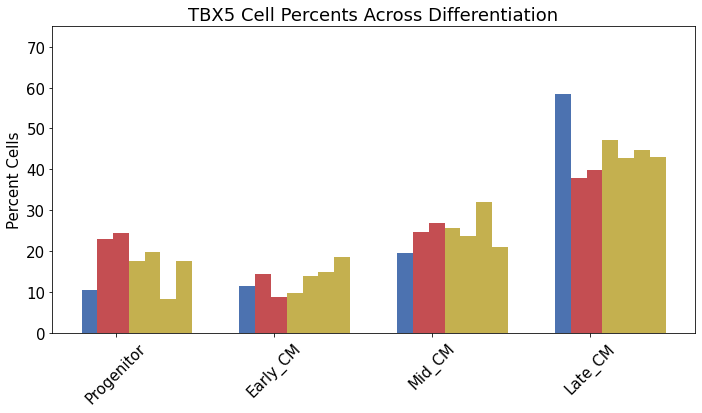

In [14]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1, figsize=(10,6))

width = 0.10

labels =  ['Progenitor', 'Early_CM', 'Mid_CM', 'Late_CM' ]


for i, c in enumerate(NC_Percents):
    ax.bar(i, c, width, color=NC_cmap[labels[i]])
    
for i, c in enumerate(TBX5_PROM1_Percents):
    ax.bar(i + width, c, width, color=TBX5_Promoters_cmap[labels[i]])
    
for i, c in enumerate(TBX5_PROM2_Percents):
    ax.bar(i + width+ width, c, width, color=TBX5_Promoters_cmap[labels[i]])
    
for i, c in enumerate(TBXEnh1_Percents):
    ax.bar(i + width+ width+ width, c, width, color=TBX5_Enhancers_cmap[labels[i]])
    
for i, c in enumerate(TBXEnh2_Percents):
    ax.bar(i + width+ width+ width+ width, c, width, color=TBX5_Enhancers_cmap[labels[i]])

for i, c in enumerate(TBXEnh3_Percents):
    ax.bar(i + width+ width+ width+ width+ width, c, width, color=TBX5_Enhancers_cmap[labels[i]])

for i, c in enumerate(TBXEnh5_Percents):
    ax.bar(i + width+ width+ width+ width+ width+ width, c, width, color=TBX5_Enhancers_cmap[labels[i]])
    
ax.set_xticks(np.arange(i+1) + .17)
ax.set_xticklabels(labels)
ax.set_ylabel('% Cells')
plt.xticks(rotation = 45)
rects = ax.patches
rect_subset = rects[4:]

plt.ylim(0, 75)
plt.ylabel('Percent Cells')
plt.title('TBX5 Cell Percents Across Differentiation')
fig.tight_layout()
fig.savefig('./TBX5_Bargraph_Across_CM.pdf')

### Violin plots of pseudotime distribution

In [15]:
Sig_Targets= ['TBX5_PROM1', 'TBX5_PROM2', 'TBXEnh1', 'TBXEnh2', 'TBXEnh3', 'TBXEnh5']

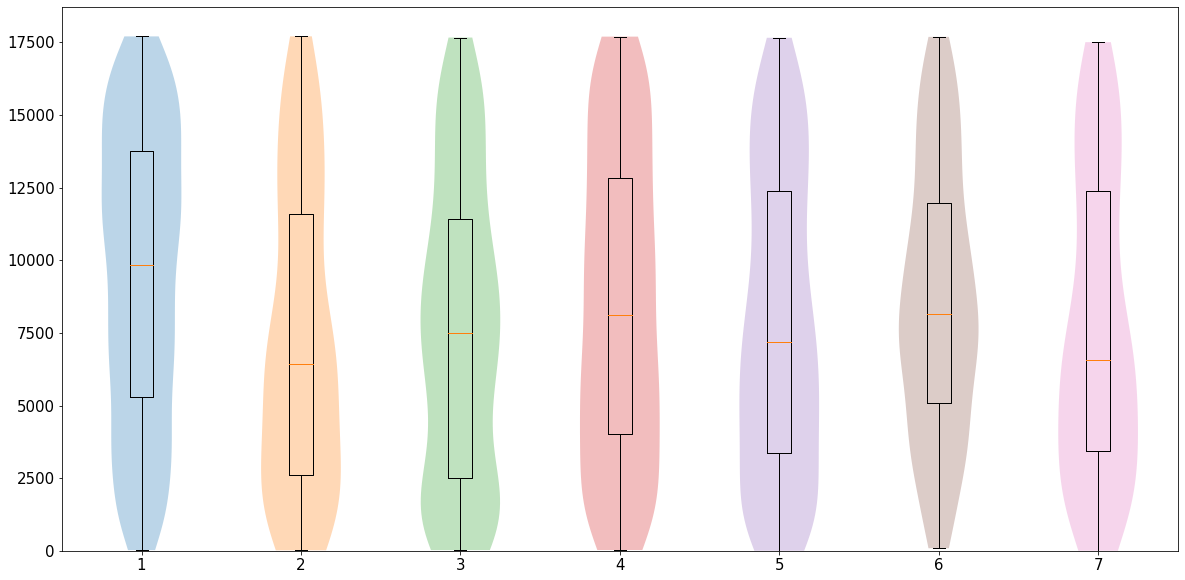

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharey=True)

target_range = list(range(2, len(Sig_Targets)+ 2))

NC_SC = CM_Cells[Clean_NC_Cells]
NC_Pseudos = NC_SC.obs.rank_pseudotime

plt.violinplot(NC_Pseudos, positions = [1], vert=True, showextrema=False)
plt.boxplot(NC_Pseudos, positions= [1], vert=True)

for i,target in enumerate(Sig_Targets):
    Cell_List = []
    [Cell_List.extend(SGRNA_CELLS_DIC[sg]) for sg in Guide_Dictionary[target]]
    Target_SC = CM_Cells[Cell_List]
    Target_Pseudos = Target_SC.obs.rank_pseudotime
    plt.violinplot(Target_Pseudos, positions = [target_range[i]], vert=True, showextrema=False)
    plt.boxplot(Target_Pseudos, positions= [target_range[i]], vert=True)

plt.ylim(0,CM_Cells.obs.rank_pseudotime.max()+1000)
fig.savefig('./TBX5_Violin_Across_CM.pdf')

In [18]:
for target in Sig_Targets:
    Cell_List = []
    [Cell_List.extend(SGRNA_CELLS_DIC[sg]) for sg in Guide_Dictionary[target]]
    Target_SC = CM_Cells[Cell_List]
    Target_Pseudos = Target_SC.obs.rank_pseudotime
    print(target + ' MW p-val ' +  str(scipy.stats.mannwhitneyu(NC_Pseudos, Target_Pseudos)[1]))

TBX5_PROM1 MW p-val 2.0450153582638688e-07
TBX5_PROM2 MW p-val 7.28310307604979e-08
TBXEnh1 MW p-val 0.0008393526595862562
TBXEnh2 MW p-val 6.759881799500743e-09
TBXEnh3 MW p-val 0.0007294279673292119
TBXEnh5 MW p-val 2.778953917694611e-06
